### 必要なパッケージのインストール

In [ ]:
!pip install pycaret
!pip install pandas-profiling==3.1.0
!pip install dice-ml

### Google Driveをマウント
* Colaboratory上で実行することを想定

In [ ]:
# Google colabを想定
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### ライブラリのインポート

In [ ]:
import os
import json
import glob
from datetime import *
import pandas as pd
import math
from pycaret.regression import *
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
import dice_ml

### Oura Ring計測データの読み込み

In [ ]:
# google driveにアクセスしたときに見えるフォルダの場所
BASE_PATH = 'drive/MyDrive/oura'

In [ ]:
target_date = date(2022, 7, 20)

patience = 5
patience_count = 0
info_list = []
while patience_count < patience:
    target_date_str = target_date.strftime('%Y-%m-%d')
    print(target_date_str)
    info = {}
    flag = True
    try:
        # 当日のreadinessスコア
        with open(f'{BASE_PATH}/data/org/readiness_summary/{target_date_str}.json', mode='rt', encoding='utf-8') as file:
            data = json.load(file)
            info['readiness_score'] = data['readiness'][0]['score']

        target_date_str = (target_date-timedelta(1)).strftime('%Y-%m-%d')

        # 前日の睡眠指標
        with open(f'{BASE_PATH}/data/org/sleep_summary/{target_date_str}.json', mode='rt', encoding='utf-8') as file:
            data = json.load(file)
            info['sleep_bedtime_end'] = data['sleep'][0]['bedtime_end']
            info['sleep_bedtime_start'] = data['sleep'][0]['bedtime_start']
            info['sleep_duration'] = data['sleep'][0]['duration']
    except:
        print('pass')
        patience_count += 1
        flag = False
        
    target_date -= timedelta(1)
    if flag:
        info_list.append(info)
        patience_count = 0

2022-07-20
pass
2022-07-19
2022-07-18
2022-07-17
2022-07-16
2022-07-15
2022-07-14
2022-07-13
2022-07-12
pass
2022-07-11
pass
2022-07-10
2022-07-09
2022-07-08
2022-07-07
2022-07-06
2022-07-05
2022-07-04
2022-07-03
2022-07-02
2022-07-01
2022-06-30
2022-06-29
2022-06-28
2022-06-27
2022-06-26
2022-06-25
2022-06-24
2022-06-23
2022-06-22
2022-06-21
2022-06-20
2022-06-19
2022-06-18
2022-06-17
2022-06-16
2022-06-15
2022-06-14
2022-06-13
2022-06-12
pass
2022-06-11
pass
2022-06-10
pass
2022-06-09
pass
2022-06-08
pass


In [ ]:
info_df = pd.DataFrame(info_list)

前処理

In [ ]:
def time_to_float_converter(x):
    time = pd.to_datetime(x)
    hour = (time.hour+24 if time.hour < 14 else time.hour) / 24 - 0.5
    minute = time.minute / (24*60)
    return (hour+minute)

info_df['sleep_bedtime_start'] = info_df['sleep_bedtime_start'].apply(lambda x: time_to_float_converter(x))
info_df['sleep_bedtime_end'] = info_df['sleep_bedtime_end'].apply(lambda x: time_to_float_converter(x))

info_df['sleep_duration'] = info_df['sleep_duration']/3600/12

In [ ]:
info_df['readiness_score'] /= 100

### Pycaretでモデリング

In [ ]:
exp = setup(info_df, target='readiness_score')

,Description,Value
0,session_id,4854
1,Target,readiness_score
2,Original Data,"(35, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(24, 3)"


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.0344,0.0020,0.0377,-3.0212,0.0208,0.0423,0.012
llar,Lasso Least Angle Regression,0.0344,0.0020,0.0377,-3.0212,0.0208,0.0423,0.012
en,Elastic Net,0.0344,0.0020,0.0377,-3.0212,0.0208,0.0423,0.013
dummy,Dummy Regressor,0.0344,0.0020,0.0377,-3.0212,0.0208,0.0423,0.011
lightgbm,Light Gradient Boosting Machine,0.0344,0.0020,0.0377,-3.0212,0.0208,0.0423,0.041
br,Bayesian Ridge,0.0344,0.0020,0.0377,-3.0304,0.0208,0.0424,0.011
ridge,Ridge Regression,0.0348,0.0021,0.0381,-3.1323,0.0210,0.0428,0.012
omp,Orthogonal Matching Pursuit,0.0373,0.0023,0.0407,-4.2562,0.0224,0.0460,0.011
lar,Least Angle Regression,0.0376,0.0023,0.0410,-4.3678,0.0226,0.0463,0.011
gbr,Gradient Boosting Regressor,0.0409,0.0022,0.0426,-4.3955,0.0236,0.0505,0.036


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=4854,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
model = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0106,0.0001,0.0109,-4.3391,0.0060,0.0131
1,0.0237,0.0007,0.0261,-6.6711,0.0144,0.0285
2,0.0462,0.0032,0.0564,-1.9202,0.0318,0.0622
3,0.0920,0.0094,0.0970,-0.0502,0.0528,0.1115
4,0.0185,0.0003,0.0186,0.0000,0.0102,0.0225
5,0.0367,0.0014,0.0379,-0.1750,0.0209,0.0447
6,0.0199,0.0005,0.0216,-3.6714,0.0120,0.0253
7,0.0624,0.0046,0.0679,-10.5116,0.0370,0.0719
8,0.0241,0.0010,0.0322,-0.6549,0.0176,0.0285


In [ ]:
tuned_model = tune_model(model, optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0063,0.0000,0.0063,-0.8113,0.0035,0.0079
1,0.0247,0.0007,0.0263,-6.7733,0.0145,0.0297
2,0.0478,0.0034,0.0585,-2.1460,0.0329,0.0644
3,0.0905,0.0092,0.0958,-0.0252,0.0522,0.1097
4,0.0167,0.0003,0.0167,0.0000,0.0092,0.0203
5,0.0387,0.0016,0.0402,-0.3186,0.0221,0.0470
6,0.0167,0.0005,0.0218,-3.7512,0.0121,0.0214
7,0.0642,0.0048,0.0695,-11.0866,0.0379,0.0740
8,0.0257,0.0011,0.0326,-0.6964,0.0178,0.0304


In [ ]:
params = model.get_params()

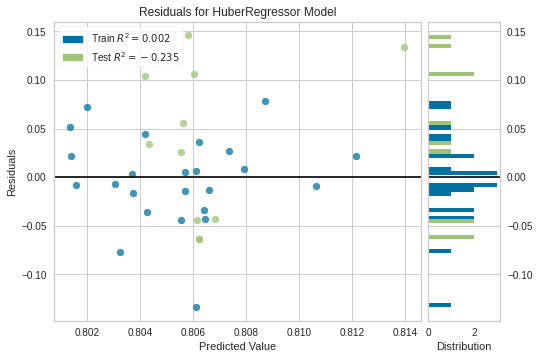

In [ ]:
plot_model(tuned_model)

In [ ]:
# interpret_model(tuned_model)

In [ ]:
predictions = predict_model(tuned_model, data=info_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,0.0467,0.0037,0.0605,-0.0356,0.0339,0.0605


### DiCEで反実仮想サンプルを生成

In [ ]:
X_train = info_df.drop(['readiness_score'], axis=1)
y_train = info_df['readiness_score']
model = HuberRegressor(**params)」
model.fit(X_train, y_train)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

In [ ]:
d = dice_ml.Data(dataframe=info_df,
                 continuous_features = list(info_df.drop(['readiness_score'], axis=1).columns), #　連続変数の指定（今回はすべて該当）
                 outcome_name = 'readiness_score')
m = dice_ml.Model(model=model, backend="sklearn", model_type='regressor')
exp = dice_ml.Dice(d, m, method="random")

In [ ]:
# index番目のサンプルを基に、counterfactuals_num個の反実仮想サンプルを生成してみる
index = 0
counterfactuals_num = 2
conf = exp.generate_counterfactuals(X_train.iloc[index:index+1, :], 
                                  total_CFs=counterfactuals_num, 
                                  features_to_vary=["sleep_bedtime_start"],
                                  permitted_range={'sleep_bedtime_start': [0.417, 0.625]}, # 21時～27時の間
                                  desired_range=[0.8, 1.0]) # スコアが80～100点ならOK
conf.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00, 10.27it/s]

Query instance (original outcome : 1)


,sleep_duration,sleep_bedtime_start,sleep_bedtime_end,readiness_score
0,0.629167,0.570833,0.885417,1.0



Diverse Counterfactual set (new outcome: [0.8, 1.0])


,sleep_duration,sleep_bedtime_start,sleep_bedtime_end,readiness_score
0,0.6291666666666667,0.5088972,0.8854166666666666,0.8009942173957825
1,0.6291666666666667,0.4631085,0.8854166666666666,0.8034189939498901


In [ ]:
# DiCEの結果をpandasに変換
conf_df = conf.cf_examples_list[0].final_cfs_df_sparse

In [ ]:
# 時刻情報に戻して出力
def float_to_time_converter(x: float):
    time_tmp = (x + 0.5) * 24
    f, i = math.modf(time_tmp)
    pred_hour = int(i)
    pred_minites = int(f*60)
    return pred_hour, pred_minites

def messenger(df):
    for i, row in df.iterrows():
        pred_hour, pred_minites = float_to_time_converter(row['sleep_bedtime_start'])
        score = row['readiness_score']
        print(f'<候補{i+1}> {pred_hour}:{pred_minites}に就寝すると{score*100:.1f}点のReadinessスコアが見込めます。')

messenger(conf_df)

<候補1> 24:12に就寝すると80.1点のReadinessスコアが見込めます。
<候補2> 23:6に就寝すると80.3点のReadinessスコアが見込めます。
